<a href="https://colab.research.google.com/github/a-donat/Benchmarks_PyCaret/blob/main/Predicting_Salary_Lookism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Set-Up

## I.A. Import Libraries and Download Data

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d aungpyaeap/beauty
! unzip '/content/beauty.zip' -d '/content/data'

In [ ]:
! pip install pycaret

In [5]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#import VisualizeDataAbbrev as viz

import numpy as np
import pandas as pd
from pycaret.regression import *
from sklearn.model_selection import train_test_split

## I.B. Load Data and Check Data Integrity

In [96]:
ds_df = pd.read_csv("/content/data/beauty.csv")


In [97]:
ds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wage      1260 non-null   float64
 1   exper     1260 non-null   int64  
 2   union     1260 non-null   int64  
 3   goodhlth  1260 non-null   int64  
 4   black     1260 non-null   int64  
 5   female    1260 non-null   int64  
 6   married   1260 non-null   int64  
 7   service   1260 non-null   int64  
 8   educ      1260 non-null   int64  
 9   looks     1260 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 98.6 KB


In [98]:
ds_df.nunique()

wage        520
exper        49
union         2
goodhlth      2
black         2
female        2
married       2
service       2
educ          8
looks         5
dtype: int64


# II. Preprocessing

In [100]:
train_df, test_df = train_test_split(
    ds_df, test_size=0.20, random_state=1)

# III. Create Models

In [101]:
reg_models = setup(
    data=train_df, target='wage', session_id=123)

,Description,Value
0,Session id,123
1,Target,wage
2,Target type,Regression
3,Original data shape,"(1008, 10)"
4,Transformed data shape,"(1008, 10)"
5,Transformed train set shape,"(705, 10)"
6,Transformed test set shape,"(303, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


In [102]:
best_model = compare_models(fold=5)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,2.3222,12.0692,3.4041,0.2540,0.4136,0.4762,0.0760
ridge,Ridge Regression,2.3318,12.0985,3.4102,0.2508,0.4152,0.4753,0.0680
lr,Linear Regression,2.3331,12.1026,3.4109,0.2504,0.4153,0.4753,1.1140
lar,Least Angle Regression,2.3331,12.1026,3.4109,0.2504,0.4153,0.4753,0.0760
huber,Huber Regressor,2.2204,12.5149,3.4594,0.2312,0.3997,0.4111,0.0980
gbr,Gradient Boosting Regressor,2.3727,12.7345,3.4977,0.2094,0.4257,0.4772,0.2160
lightgbm,Light Gradient Boosting Machine,2.4074,12.8067,3.5143,0.1999,0.4270,0.4850,0.2760
en,Elastic Net,2.5130,13.4806,3.6055,0.1606,0.4473,0.5511,0.0720
lasso,Lasso Regression,2.5305,13.6408,3.6312,0.1471,0.4514,0.5595,0.0680
llar,Lasso Least Angle Regression,2.5305,13.6408,3.6312,0.1471,0.4514,0.5595,0.0660


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

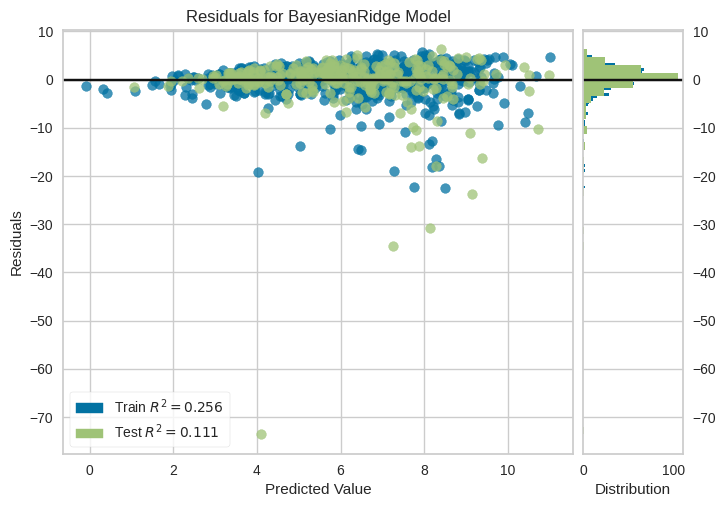

In [103]:
plot_model(best_model)